In [1]:
from micrograd.engine import Value
from micrograd.nn import MLP
from micrograd.utils import draw_dot

In [2]:
n = MLP(3, [4, 4, 1])

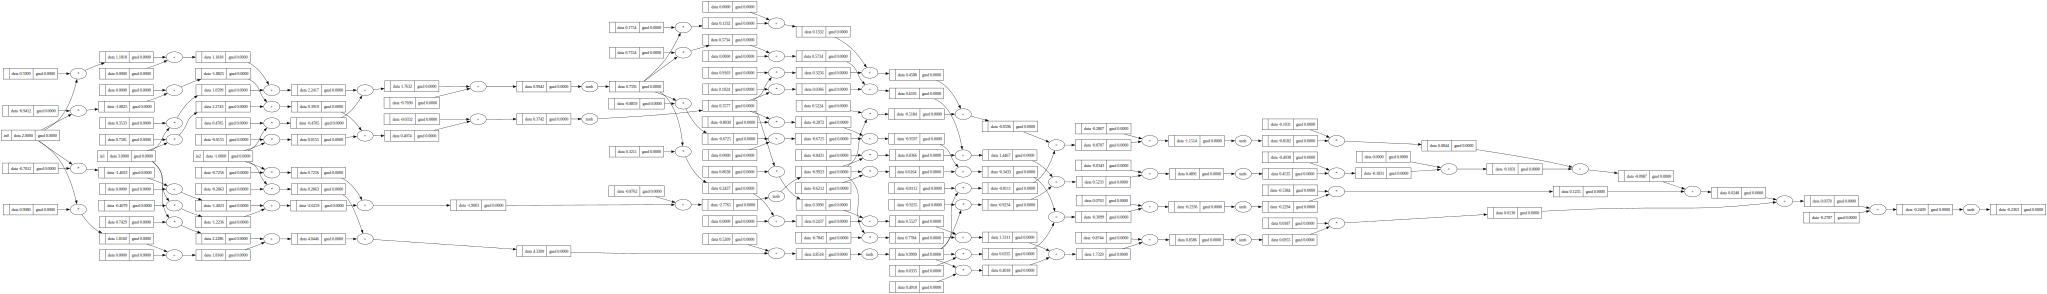

In [3]:
x = [Value(2.0, label="in0"), Value(3.0, label="in1"), Value(-1.0, label="in2")]
draw_dot(n(x))

In [4]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]
ypred = [n(x) for x in xs]
ypred

[Value(data=-0.236308352611262),
 Value(data=-0.6030221309577319),
 Value(data=-0.3804574523683618),
 Value(data=-0.40418992251211305)]

In [5]:
for k in range(30):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))    

    # backward pass
    n.zero_grad()
    loss.backward()

    # update
    for p in n.parameters():
        p.data += -0.1 * p.grad

    print(k, loss.data)

0 4.041632078056187
1 3.8207818874154182
2 3.169540680115283
3 2.9287543930527034
4 2.0085114590174897
5 2.2184645644731673
6 0.8369489465442209
7 0.08588038410170665
8 0.06419279992825108
9 0.05267932616610246
10 0.045054919729547456
11 0.039477917804699586
12 0.03516349103271174
13 0.031703174984308996
14 0.028856260014950126
15 0.02646859719541758
16 0.02443550291121201
17 0.022682736142250224
18 0.021155863358150034
19 0.019813905148882413
20 0.018625338143117377
21 0.01756547213271443
22 0.01661466993133361
23 0.015757104624363135
24 0.01497987106802189
25 0.014272337560963516
26 0.01362566431222902
27 0.01303244018810583
28 0.0124864048798203
29 0.01198223376731637
